In [1]:
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("全模式: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("精确模式: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Sai\AppData\Local\Temp\jieba.cache
Loading model cost 0.567 seconds.
Prefix dict has been built successfully.


全模式: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
精确模式: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦


In [7]:
import jieba
from collections import Counter
from wordcloud import WordCloud
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt


In [8]:
data = {}
textfile = open('./data/19Congress.txt', 'r', encoding='utf-8')
text = textfile.read()
# 加载停用词文件
with open('./data/stopwords.txt', encoding='utf') as file:
    stopwords = {line.strip() for line in file}

seg_list = jieba.cut(text)
for word in seg_list:
    if len(word) >= 2:
        if not data.__contains__(word):
            data[word] = 0
        data[word] += 1

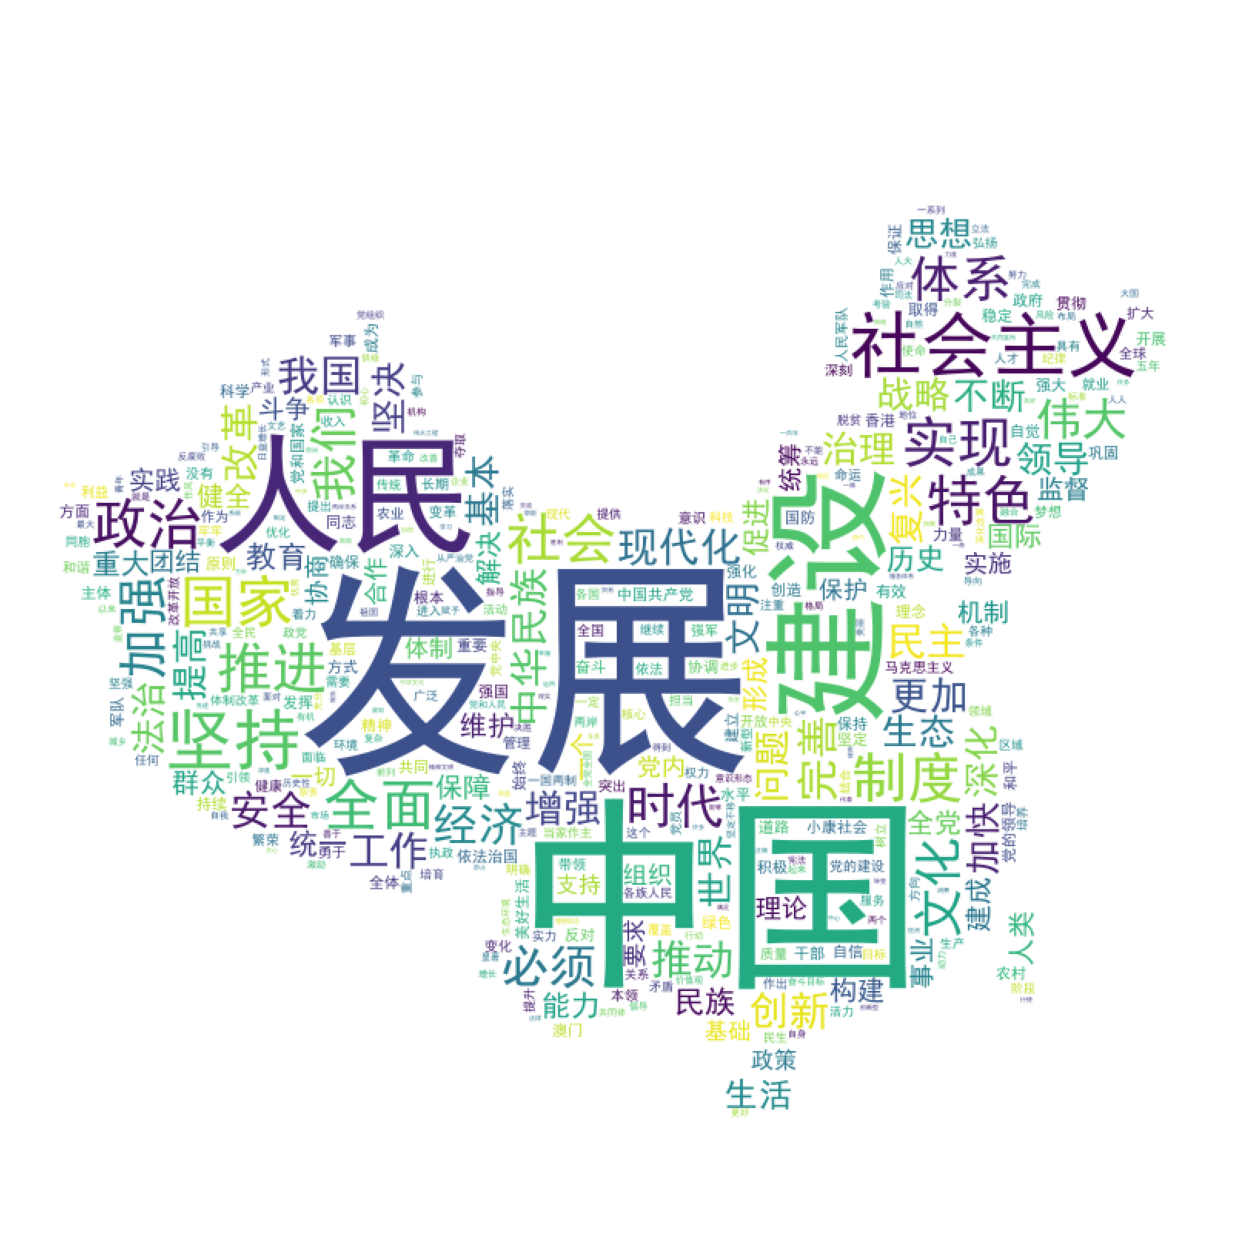

In [9]:

        
# 生成词云
my_wordcloud = WordCloud(
    background_color='white',
    max_words=400,
    font_path='./data/SimHei.ttf',
    mask=imread('./data/mapofChina.jpg'),            # 制定画在什么图片上
    width=1000,
    height=1000,
    stopwords=stopwords
).generate_from_frequencies(data)


# 画图
plt.figure(figsize=(18, 16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
textfile.close()